In [1]:
#!/usr/bin/env python

"""
Created on Wed Feb 1 20:26:35 2023

@author: Stefano Veroni, Vid Homsak
"""

from causets_py import relfunctions as rel
import sympy as sp
import numpy as np
import pandas as pd

sp.init_printing()

In [2]:
print("\n################ EF Original ##########################\n")
t, r, theta, phi, M = sp.symbols('t r θ φ M', real = True)
cs = [t, r, theta, phi]

print("\n STEP 1: THE METRIC & SURFACES ################\n")
g_ij = sp.Matrix([[2*M/r-1,    2*M/r   , 0   , 0],
               [2*M/r  ,   2*M/r+1  , 0   , 0],
               [0      ,      0     , r**2, 0],
               [0      ,      0     , 0   , r**2 * (sp.sin(theta))**2]]
              )
g_inv = g_ij.inv()
print("g_mn")
rel.print4D(g_ij)
print("g^mn")
rel.print4D(g_inv)

# Define the horizon and hypersurface
rS = 2*M
H = r - rS
Sigma = t
print(f"Horizon : {H}")
print(f"Sigma   : {Sigma}")
# Define the definition of J
Jreplace = [(r,2*M), (t,0)]


################ EF Original ##########################


 STEP 1: THE METRIC & SURFACES ################



g_mn
(2*M - r)/r          2*M/r       0                 0   
      2*M/r    (2*M + r)/r       0                 0   
          0              0    r**2                 0   
          0              0       0    r**2*sin(θ)**2   
g^mn
(-2*M - r)/r           2*M/r          0                     0   
       2*M/r    (-2*M + r)/r          0                     0   
           0               0    r**(-2)                     0   
           0               0          0    1/(r**2*sin(θ)**2)   
Horizon : -2*M + r
Sigma   : t


In [3]:
print("\n STEP 2: THE VECTORS  ################\n")
# Define the covector n_mu normal to sigma
A = sp.symbols('A', real=True)
n_cov = A*sp.Matrix([sp.diff(Sigma, coord) for coord in cs])
n_vec = g_inv*n_cov
# Impose the condition n^mu n_mu = -1 and solve for A
eq = sp.Eq(n_vec.dot(n_cov), -1)
A_val = sp.solve(eq, A)[0]
# Substitute the value of A in n_cov and n_vec
n_cov = n_cov.subs(A, A_val)
n_vec = n_vec.subs(A, A_val)
# Print n_cov and n_vec
print("\nn^mu is the future pointing vector normal to Sigma, s.t. [n^2]_J=-1")
n_cov.simplify()
n_vec.simplify()
print("Covector n_mu =")
sp.pprint(n_cov)
print("Vector n^mu =")
sp.pprint(n_vec)


# Define the covector k_mu future pointing null-vector to H
lamb = sp.symbols('lamb', real=True)
k_cov = lamb*sp.Matrix([sp.diff(H, coord) for coord in (t, r, theta, phi)])
# Raise the index to find the vector k^mu
k_vec = g_inv*k_cov
# Impose k^mu n_mu = -1/sqrt(2) at J to solve for lamb
k_mult_n = k_vec.dot(n_cov)
eqk = sp.Eq(k_mult_n.subs(Jreplace), -1/sp.sqrt(2))
lamb_val = sp.solve(eqk, lamb)[0]
# Substitute the value of lamb in k_cov and k_vec
k_cov = k_cov.subs(lamb, lamb_val)
k_vec = k_vec.subs(lamb, lamb_val)
# Print k_cov, k_vec
print("\nk^mu is the future pointing null vector on H, s.t. [k^mu n_mu]_J=-1")
k_cov.simplify()
k_vec.simplify()
print("Covector k_mu =")
sp.pprint(k_cov)
print("Vector k^mu =")
sp.pprint(k_vec)


# Define spacelike m^mu
m_vec = sp.sqrt(2)*k_vec - n_vec
m_cov = g_ij*m_vec
# Print m^mu and m_mu in general
print("m^mu is the spacelike sqrt(2)k^mu - n^mu, tangent to Sigma, ortho to J")
m_cov.simplify()
m_vec.simplify()
print("Vector m^mu =")
sp.pprint(m_vec)
print("Covector m_mu =")
sp.pprint(m_cov)
print("Check n.1: m.m = 1 at J")
m2 = m_vec.dot(m_cov).subs(Jreplace).simplify()
sp.pprint(m2)
print("Check n.1: m.n = 0 at J")
mn = m_vec.dot(n_cov).subs(Jreplace).simplify()
sp.pprint(mn)

# Evaluate the vectors and covectors at J = H = 0 and Sigma = 0
n_cov_J = n_cov.subs(Jreplace)
n_vec_J = n_vec.subs(Jreplace)
k_cov_J = k_cov.subs(Jreplace)
k_vec_J = k_vec.subs(Jreplace)
m_vec_J = m_vec.subs(Jreplace)
m_cov_J = m_cov.subs(Jreplace)
# ell_vec_J = ell_vec.subs(Jreplace)
# ell_cov_J = ell_cov.subs(Jreplace)

# Print n_cov, n_vec, k_cov, k_vec evaluated at H = 0 and Sigma = 0
print("\nCovector n_mu at H = 0, Sigma = 0:")
sp.pprint(n_cov_J)
print("\nVector n^mu at H = 0, Sigma = 0:")
sp.pprint(n_vec_J)
print("\nCovector k_mu at H = 0, Sigma = 0:")
sp.pprint(k_cov_J)
print("\nVector k^mu at H = 0, Sigma = 0:")
sp.pprint(k_vec_J)
# Print m^mu and m_mu at H=0 and Sigma=0
print("\nVector m^mu at H=0 and Sigma=0:")
sp.pprint(m_vec_J)
print("\nCovector m_mu at H=0 and Sigma=0:")
sp.pprint(m_cov_J)
# Print ell^mu and ell_mu at H=0 and Sigma=0
# print("\nVector ell^mu at H=0 and Sigma=0:")
# sp.pprint(ell_vec_J)
# print("\nCovector ell_mu at H=0 and Sigma=0:")
# sp.pprint(ell_cov_J)


 STEP 2: THE VECTORS  ################


n^mu is the future pointing vector normal to Sigma, s.t. [n^2]_J=-1
Covector n_mu =
⎡     _________⎤
⎢    ╱    r    ⎥
⎢-  ╱  ─────── ⎥
⎢ ╲╱   2⋅M + r ⎥
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      0       ⎦
Vector n^mu =
⎡    _________          ⎤
⎢   ╱    r              ⎥
⎢  ╱  ─────── ⋅(2⋅M + r)⎥
⎢╲╱   2⋅M + r           ⎥
⎢───────────────────────⎥
⎢           r           ⎥
⎢                       ⎥
⎢           _________   ⎥
⎢          ╱    r       ⎥
⎢  -2⋅M⋅  ╱  ───────    ⎥
⎢       ╲╱   2⋅M + r    ⎥
⎢  ───────────────────  ⎥
⎢           r           ⎥
⎢                       ⎥
⎢           0           ⎥
⎢                       ⎥
⎣           0           ⎦

k^mu is the future pointing null vector on H, s.t. [k^mu n_mu]_J=-1
Covector k_mu =
⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
Vector k^mu =
⎡  2⋅M   ⎤
⎢  ───   ⎥
⎢   r    ⎥
⎢        ⎥
⎢-2⋅M + r⎥
⎢────────⎥
⎢   r    ⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎣   0    ⎦


In [4]:
print("\n STEP 3: THE PROJECTORS  ################\n")
h_ab = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
h_up = g_ij.inv().subs(Jreplace)
for a in range(4):
    for b in range(4):
        h_ab[a,b] += n_vec[a]*n_cov[b]
        h_up[a,b] += n_vec[a]*n_vec[b]

sigma_ab_J = h_ab.subs(Jreplace)
for a in range(4):
    for b in range(4):
        sigma_ab_J[a,b] -= m_vec_J[a] * m_cov_J[b]

h_ab_J = h_ab.subs(Jreplace)

print("\nProjector h^a_b")
rel.print4D(h_ab)
print("\nProjector h^a_b at J")
rel.print4D(h_ab.subs(Jreplace))
print("\nProjector h^{ab} at J")
rel.print4D(h_up.subs(Jreplace))
print("\nProjector sigma^a_b at J")
rel.print4D(sigma_ab_J)


 STEP 3: THE PROJECTORS  ################


Projector h^a_b
            0    0    0    0   
2*M/(2*M + r)    1    0    0   
            0    0    1    0   
            0    0    0    1   

Projector h^a_b at J
  0    0    0    0   
1/2    1    0    0   
  0    0    1    0   
  0    0    0    1   

Projector h^{ab} at J
0      0             0                       0   
0    1/2             0                       0   
0      0    1/(4*M**2)                       0   
0      0             0    1/(4*M**2*sin(θ)**2)   

Projector sigma^a_b at J
0    0    0    0   
0    0    0    0   
0    0    1    0   
0    0    0    1   


In [5]:
print("\n STEP 4: THE COVARIANT DERIVATIVES  ################\n")
n_cd = rel.covDerivative_covector(n_cov, g_ij, cs)
k_ab_J = rel.covDerivative_covector(k_cov, g_ij, cs).subs(Jreplace)
n_cd_J = n_cd.subs(Jreplace)

print("\nnabla_d n_c")
rel.print4D(n_cd)
print("\nnabla_d n_c at J")
rel.print4D(n_cd_J)
print("\nnabla_b k_a at J")
rel.print4D(k_ab_J)


 STEP 4: THE COVARIANT DERIVATIVES  ################


nabla_d n_c
       2.0*M**2*sqrt(r/(2*M + r))/r**3    4*M**2*sqrt(r/(2*M + r))*(M + r)/(r**3*(2*M + r))                           0                                     0   
1.0*M*sqrt(r/(2*M + r))*(2*M + r)/r**3                 2.0*M*sqrt(r/(2*M + r))*(M + r)/r**3                           0                                     0   
                                     0                                                    0    -2.0*M*sqrt(r/(2*M + r))                                     0   
                                     0                                                    0                           0    -2.0*M*sqrt(r/(2*M + r))*sin(θ)**2   

nabla_d n_c at J
0.125*sqrt(2)/M    0.1875*sqrt(2)/M                 0                           0   
 0.25*sqrt(2)/M     0.375*sqrt(2)/M                 0                           0   
              0                   0    -1.0*sqrt(2)*M                           0   
              0

In [6]:
print("\n STEP 5: THE GEOMETRIC INVARIANTS  ################\n")
Kcurvature_ab_J = sp.Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
for mu in range(4):
    for nu in range(4):
        for c in range(4):
            for d in range(4):
                Kcurvature_ab_J[mu, nu]\
                    += n_cd_J[c, d] * h_ab_J[c, mu] * h_ab_J[d, nu]

Theta_J = 0
for mu in range(4):
    for nu in range(4):
        Theta_J += k_ab_J[mu,nu] * sigma_ab_J[mu,nu]

Ktrace_J = rel.trace(g_ij.subs(Jreplace), Kcurvature_ab_J).subs(Jreplace)
# Ktrace_J = 0
# for i in range(4):
#     for j in range(4):
#         Ktrace_J += h_up[i,j]*Kcurvature_ab_J[i,j]

Km_J = 0
for mu in range(4):
    for nu in range(4):
        Km_J += Kcurvature_ab_J[mu, nu]*m_vec_J[mu]*m_vec_J[nu]


print("\nK curvature tensor at J")
rel.print4D(Kcurvature_ab_J)
print("\nTrace of curvature K at J")
print(Ktrace_J.subs(Jreplace))
print("\nComponent of K along m")
print(Km_J)
print("\n Null Expansion Theta")
print(Theta_J)


 STEP 5: THE GEOMETRIC INVARIANTS  ################


K curvature tensor at J
0.09375*sqrt(2)/M    0.1875*sqrt(2)/M                 0                           0   
 0.1875*sqrt(2)/M     0.375*sqrt(2)/M                 0                           0   
                0                   0    -1.0*sqrt(2)*M                           0   
                0                   0                 0    -1.0*sqrt(2)*M*sin(θ)**2   

Trace of curvature K at J
-0.3125*sqrt(2)/M

Component of K along m
0.1875*sqrt(2)/M

 Null Expansion Theta
0


In [7]:
S = 0
for i in range(4):
    for j in range(4):
        S += h_up[i,j]*Kcurvature_ab_J[i,j]
print(S.subs(Jreplace))

-0.3125*sqrt(2)/M



 STEP 6: THE CORRECTION a^{(1)}_L  ################

-0.00554885*sqrt(2)/M


The EF-original non-zero Christoffel Symbols are

G^0_00 =  2.0*M**2/r**3
G^0_01 =  1.0*M*(2*M + r)/r**3
G^0_10 =  1.0*M*(2*M + r)/r**3
G^0_11 =  2.0*M*(M + r)/r**3
G^0_22 =  -2.0*M
G^0_33 =  -2.0*M*sin(θ)**2
G^1_00 =  -1.0*M*(2*M - r)/r**3
G^1_01 =  -2.0*M**2/r**3
G^1_10 =  -2.0*M**2/r**3
G^1_11 =  M*(-2.0*M - 1.0*r)/r**3
G^1_22 =  2.0*M - 1.0*r
G^1_33 =  (2.0*M - 1.0*r)*sin(θ)**2
G^2_12 =  1.0/r
G^2_21 =  1.0/r
G^2_33 =  -0.5*sin(2*θ)
G^3_13 =  1.0/r
G^3_23 =  1.0/tan(θ)
G^3_31 =  1.0/r
G^3_32 =  1.0/tan(θ)


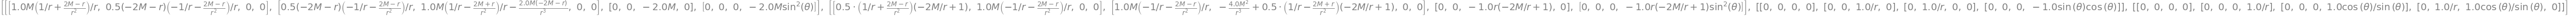

In [8]:
print("\n STEP 6: THE CORRECTION a^{(1)}_L  ################\n")
print(-1.*(0.0355127*Ktrace_J.subs(Jreplace) + 0.0887817*Km_J + 0.209*Theta_J))

print("\n\nThe EF-original non-zero Christoffel Symbols are\n")
rel.printChris(g_ij, cs)

# wrong bit
# print("\n\nTrace of K_ab\n")
# Kab = sp.Matrix([[-sp.sqrt(2)/M  ,    -2*sp.sqrt(2)/M   , 0    , 0],
#                [-2*sp.sqrt(2)/M,    -4*sp.sqrt(2)/M   , 0    , 0],
#                [     0      ,          0        , -64*M, 0],
#                [     0      ,          0        , 0    , -64*M * (sp.sin(theta))**2]]
#               ) /32
# tr = rel.trace(g_ij.subs(r, 2*M), Kab)
# print(tr)
# tr = rel.trace(g_ij, Kab)
# print(tr.subs(r,2*M))

# blob = tr.subs(r,2*M)
# print(blob.subs(M, 1))